In the given piece of code, several mathematical concepts and operations are used. Here's a breakdown of the math involved:

1. **Normalization**: The data is normalized using the Min-Max scaling technique. It scales the values between 0 and 1, allowing the model to work with a consistent range of values. The formula for Min-Max scaling is:

$$
x' = \frac{{x - \text{{min}}(x)}}{{\text{{max}}(x) - \text{{min}}(x)}}
$$

where \(x\) is the original value, \(x'\) is the normalized value, \(\text{{min}}(x)\) is the minimum value in the dataset, and \(\text{{max}}(x)\) is the maximum value in the dataset.

2. **Time Steps**: The number of time steps (window size) is defined as 30. It determines how many previous time steps are used to predict the next value in a time series.

3. **Input Sequences and Target Values**: The input sequences and corresponding target values are created for the training and test sets. For each time step, an input sequence is formed by taking the previous time_steps number of data points. The target value is the next data point after the input sequence.

4. **LSTM Model**: An LSTM (Long Short-Term Memory) model is built using the Keras Sequential API. It is a type of recurrent neural network (RNN) architecture commonly used for sequence prediction tasks. The model consists of LSTM layers with 64 units each, followed by a Dense layer with the same number of output units as the number of columns in the price data.

5. **Loss Function**: The model is compiled with the mean squared error (MSE) loss function, which measures the average squared difference between the predicted and actual values. The optimizer used is Adam, which is a popular optimization algorithm.

6. **Model Training**: The model is trained using the training data (X_train and y_train) for a specified number of epochs (100) and a batch size of 32. The validation data (X_test and y_test) is used to evaluate the model's performance after each epoch.

7. **Prediction and Inverse Transform**: After training, the model is used to make predictions on both the training and test data. The predicted values are then inverse transformed using the Min-Max scaler to obtain the original scale of the data.

8. **Evaluation Metrics**: Several evaluation metrics are calculated to assess the model's performance. These metrics include root mean squared error (RMSE), mean absolute error (MAE), and R-squared (R^2) score. RMSE measures the average deviation of the predicted values from the actual values, MAE measures the average absolute difference between them, and R^2 score indicates the proportion of the variance in the dependent variable that is predictable from the independent variables.

9. **Plotting**: Finally, the training loss and validation loss are plotted over epochs using Matplotlib to visualize the model's learning progress.

The Long Short-Term Memory (LSTM) model is a type of recurrent neural network (RNN) architecture that is designed to handle sequence data. It uses memory cells to capture long-term dependencies in the input sequences. Here's the mathematical formulation of an LSTM cell:

Given an input sequence \(\mathbf{x}_t\) at time step \(t\), an LSTM cell consists of several components:

1. **Input Gate**: It determines how much of the new input information should be stored in the cell's memory. The input gate is computed as:

$$
\mathbf{i}_t = \sigma(\mathbf{W}_i \cdot [\mathbf{h}_{t-1}, \mathbf{x}_t] + \mathbf{b}_i)
$$

where \(\mathbf{i}_t\) is the input gate activation, \(\sigma\) is the sigmoid activation function, \(\mathbf{W}_i\) and \(\mathbf{b}_i\) are the weight matrix and bias vector for the input gate, and \(\mathbf{h}_{t-1}\) is the previous hidden state.

2. **Forget Gate**: It determines how much of the previous memory should be forgotten. The forget gate is computed as:

$$
\mathbf{f}_t = \sigma(\mathbf{W}_f \cdot [\mathbf{h}_{t-1}, \mathbf{x}_t] + \mathbf{b}_f)
$$

where \(\mathbf{f}_t\) is the forget gate activation, \(\mathbf{W}_f\) and \(\mathbf{b}_f\) are the weight matrix and bias vector for the forget gate.

3. **Memory Cell**: It computes the new cell state by combining the previous memory with the new input information. The memory cell is computed as:

$$
\mathbf{c}_t = \mathbf{f}_t \odot \mathbf{c}_{t-1} + \mathbf{i}_t \odot \tanh(\mathbf{W}_c \cdot [\mathbf{h}_{t-1}, \mathbf{x}_t] + \mathbf{b}_c)
$$

where \(\mathbf{c}_t\) is the current cell state, \(\mathbf{W}_c\) and \(\mathbf{b}_c\) are the weight matrix and bias vector for the memory cell, and \(\odot\) represents element-wise multiplication.

4. **Output Gate**: It determines how much of the cell state should be outputted as the hidden state. The output gate is computed as:

$$
\mathbf{o}_t = \sigma(\mathbf{W}_o \cdot [\mathbf{h}_{t-1}, \mathbf{x}_t] + \mathbf{b}_o)
$$

where \(\mathbf{o}_t\) is the output gate activation, \(\mathbf{W}_o\) and \(\mathbf{b}_o\) are the weight matrix and bias vector for the output gate.

5. **Hidden State**: It is the output of the LSTM cell and represents the learned representation of the input sequence. The hidden state is computed as:

$$
\mathbf{h}_t = \mathbf{o}_t \odot \tanh(\mathbf{c}_t)
$$

where \(\mathbf{h}_t\) is the current hidden state.

In the given code, two LSTM layers with 64 units each are stacked on top of each other. The input shape of the first LSTM layer is determined by the number of time steps.

In [27]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("cleaned_stock_data_no_nan.csv")

# Select the columns 'Open', 'High', 'Low', 'Close', 'Adj Close'
price = df[['Open', 'High', 'Low', 'Close', 'Adj Close']]

# Normalize the data
scaler = MinMaxScaler()
normalized_price = scaler.fit_transform(price)

# Split the data into train and test sets
train_size = int(len(normalized_price) * 0.8)
train_data, test_data = normalized_price[:train_size], normalized_price[train_size:]

# Define the number of time steps
time_steps = 30

# Create the input sequences and target values for training set
X_train = []
y_train = []
for i in range(time_steps, len(train_data)):
    X_train.append(train_data[i - time_steps:i])
    y_train.append(train_data[i])

# Convert the lists to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)

# Create the input sequences and target values for test set
X_test = []
y_test = []
for i in range(time_steps, len(test_data)):
    X_test.append(test_data[i - time_steps:i])
    y_test.append(test_data[i])

# Convert the lists to numpy arrays
X_test = np.array(X_test)
y_test = np.array(y_test)

# Build the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(time_steps, price.shape[1]), return_sequences=True))
model.add(LSTM(64))
model.add(Dense(price.shape[1]))
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Inverse transform the predictions and actual values
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)
y_train = scaler.inverse_transform(y_train)
y_test = scaler.inverse_transform(y_test)

# Evaluate the model
train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
train_mae = mean_absolute_error(y_train, train_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)
train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)

Epoch 1/100
131/131 [==============================] - 7s 32ms/step - loss: 0.0065 - val_loss: 6.8458e-04
Epoch 2/100
131/131 [==============================] - 4s 27ms/step - loss: 0.0013 - val_loss: 4.1489e-04
Epoch 3/100
131/131 [==============================] - 4s 27ms/step - loss: 0.0010 - val_loss: 2.8092e-04
Epoch 4/100
131/131 [==============================] - 3s 26ms/step - loss: 8.2710e-04 - val_loss: 4.1835e-04
Epoch 5/100
131/131 [==============================] - 3s 27ms/step - loss: 8.1915e-04 - val_loss: 4.1278e-04
Epoch 6/100
131/131 [==============================] - 4s 31ms/step - loss: 6.4764e-04 - val_loss: 2.6955e-04
Epoch 7/100
131/131 [==============================] - 5s 38ms/step - loss: 5.6127e-04 - val_loss: 5.0129e-04
Epoch 8/100
131/131 [==============================] - 4s 29ms/step - loss: 6.0627e-04 - val_loss: 1.7078e-04
Epoch 9/100
131/131 [==============================] - 4s 27ms/step - loss: 5.2921e-04 - val_loss: 2.0589e-04
Epoch 10/100
131/131 [

Epoch 75/100
131/131 [==============================] - 4s 28ms/step - loss: 3.2965e-04 - val_loss: 9.6604e-05
Epoch 76/100
131/131 [==============================] - 3s 26ms/step - loss: 3.3135e-04 - val_loss: 9.1588e-05
Epoch 77/100
131/131 [==============================] - 4s 28ms/step - loss: 3.1691e-04 - val_loss: 7.9306e-05
Epoch 78/100
131/131 [==============================] - 3s 26ms/step - loss: 3.1938e-04 - val_loss: 8.7529e-05
Epoch 79/100
131/131 [==============================] - 3s 24ms/step - loss: 3.2724e-04 - val_loss: 7.7933e-05
Epoch 80/100
131/131 [==============================] - 3s 26ms/step - loss: 3.4828e-04 - val_loss: 7.6799e-05
Epoch 81/100
131/131 [==============================] - 3s 24ms/step - loss: 3.1116e-04 - val_loss: 7.9737e-05
Epoch 82/100
131/131 [==============================] - 3s 24ms/step - loss: 3.2322e-04 - val_loss: 9.8846e-05
Epoch 83/100
131/131 [==============================] - 3s 26ms/step - loss: 3.0932e-04 - val_loss: 4.0479e-04
E

Training RMSE: 5.295809794746292
Testing RMSE: 2.92303310421946
Training MAE: 1.9148558672089693
Testing MAE: 2.087437558759066
Training R^2: 0.9944750928063562
Testing R^2: 0.9916690566947363


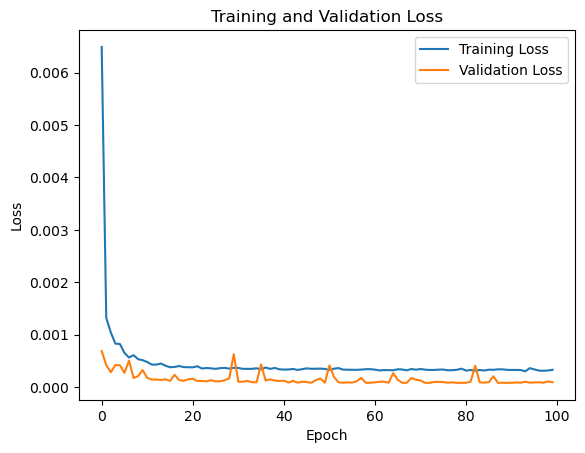

In [29]:
# Print the evaluation metrics
print("Training RMSE:", train_rmse)
print("Testing RMSE:", test_rmse)
print("Training MAE:", train_mae)
print("Testing MAE:", test_mae)
print("Training R^2:", train_r2)
print("Testing R^2:", test_r2)

# Plot the training loss and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

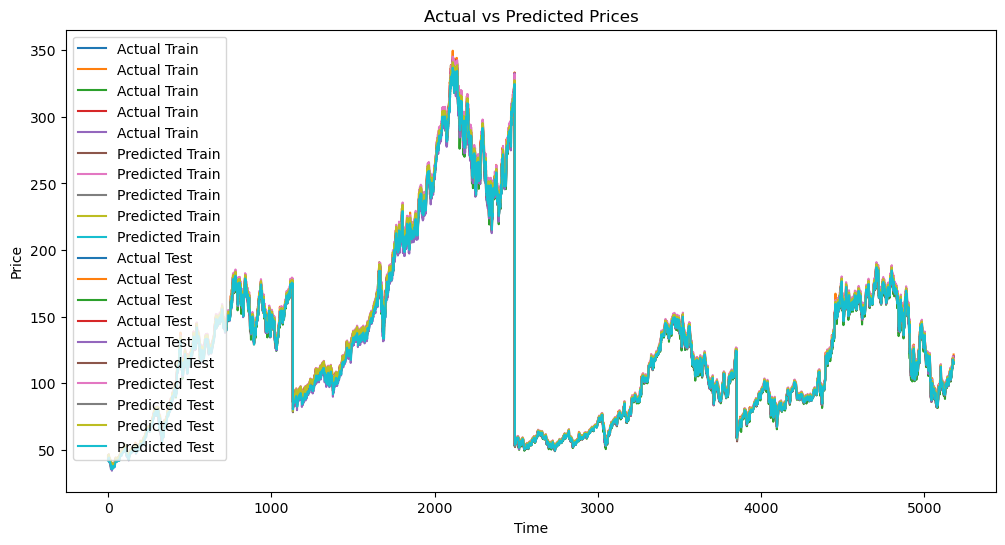

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(y_train, label='Actual Train')
plt.plot(train_predictions, label='Predicted Train')
plt.plot(len(y_train) + np.arange(len(y_test)), y_test, label='Actual Test')
plt.plot(len(y_train) + np.arange(len(y_test)), test_predictions, label='Predicted Test')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()

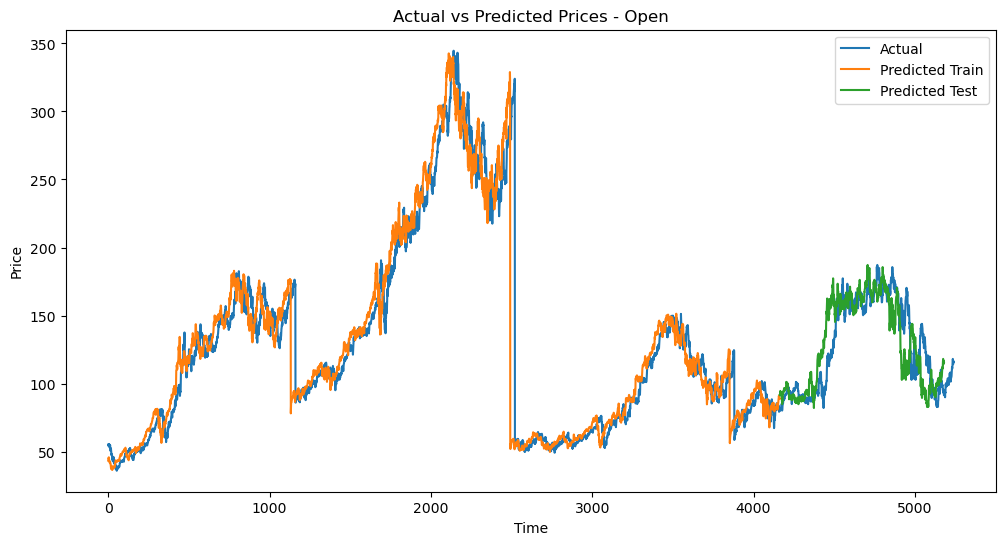

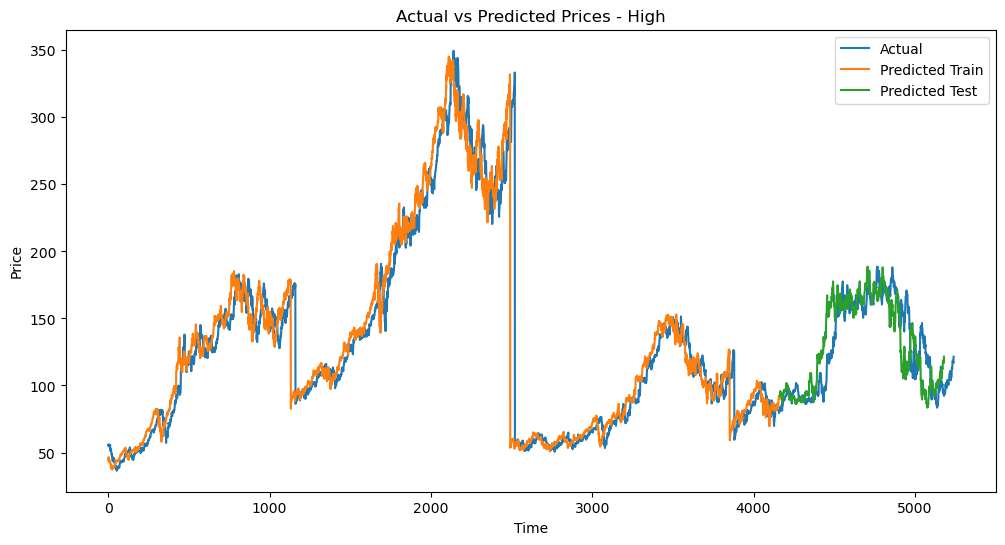

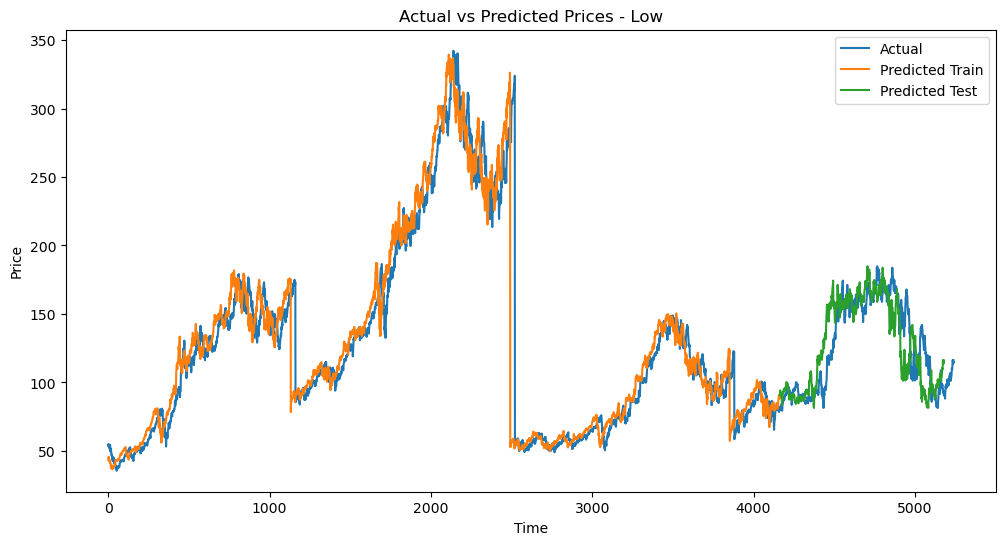

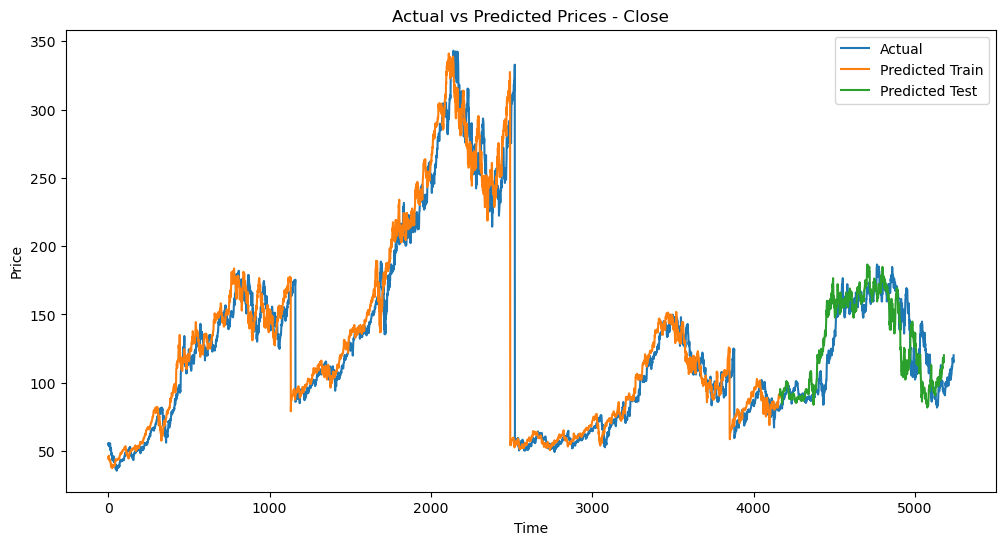

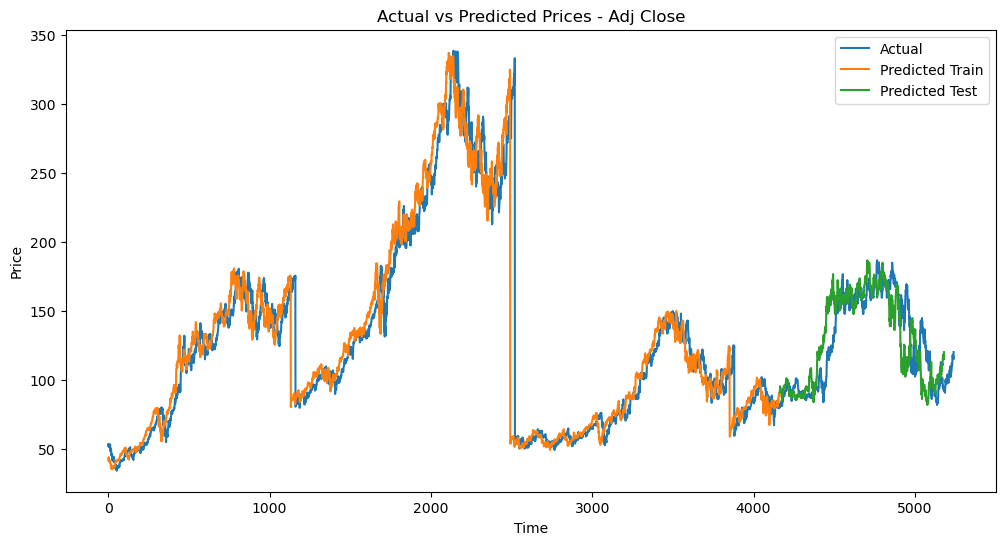

In [33]:
# Get the column names as a list
columns = price.columns.tolist()

# Plot the actual vs predicted prices for each column
for column in columns:
    plt.figure(figsize=(12, 6))
    plt.plot(price[column], label='Actual')
    plt.plot(train_predictions[:, columns.index(column)], label='Predicted Train')
    plt.plot(len(y_train) + np.arange(len(y_test)), y_test[:, columns.index(column)], label='Predicted Test')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.title(f'Actual vs Predicted Prices - {column}')
    plt.legend()
    plt.show()

In [45]:
# Compute the volatility of each feature
train_volatility = np.std(train_predictions, axis=0)
test_volatility = np.std(test_predictions, axis=0)

# Print the volatility of each feature
print("LSTM Training Volatility:")
print(train_volatility)
print("LSTM Testing Volatility:")
print(test_volatility)

LSTM Training Volatility:
[71.89175 72.65818 71.21012 71.85669 71.04901]
LSTM Testing Volatility:
[32.446777 32.8988   32.210342 32.508957 32.099052]


## A naive forecasting as a baseline model

In [35]:
# a baseline model 

# Baseline model using previous day's closing price
baseline_train_predictions = np.roll(y_train, 1)
baseline_test_predictions = np.roll(y_test, 1)

# Calculate RMSE for the baseline model
baseline_train_rmse = np.sqrt(mean_squared_error(y_train, baseline_train_predictions))
baseline_test_rmse = np.sqrt(mean_squared_error(y_test, baseline_test_predictions))

print("Baseline Training RMSE:", baseline_train_rmse)
print("Baseline Testing RMSE:", baseline_test_rmse)

Baseline Training RMSE: 3.588511928034106
Baseline Testing RMSE: 2.433001206340188


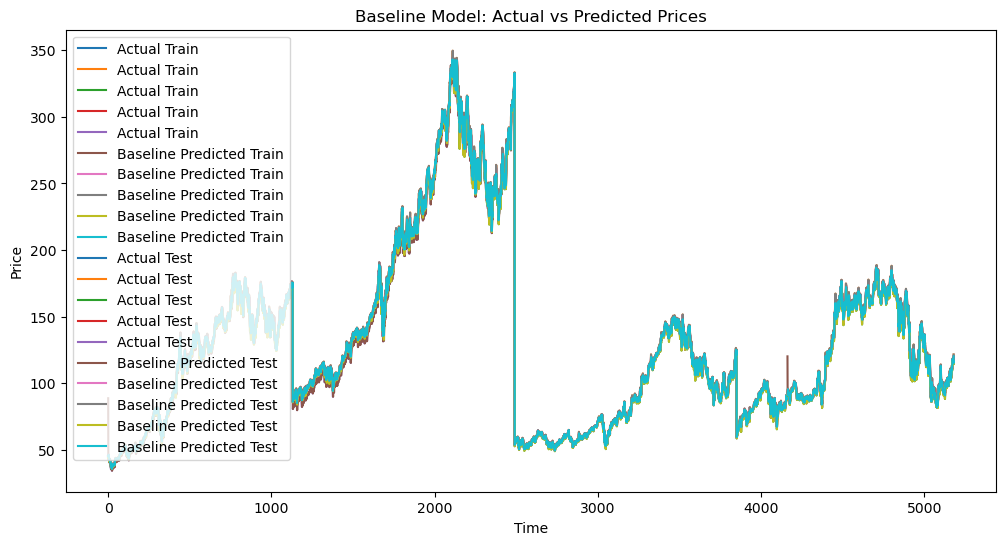

In [36]:
# Plot the baseline predictions
plt.figure(figsize=(12, 6))
plt.plot(y_train, label='Actual Train')
plt.plot(baseline_train_predictions, label='Baseline Predicted Train')
plt.plot(len(y_train) + np.arange(len(y_test)), y_test, label='Actual Test')
plt.plot(len(y_train) + np.arange(len(y_test)), baseline_test_predictions, label='Baseline Predicted Test')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Baseline Model: Actual vs Predicted Prices')
plt.legend()
plt.show()

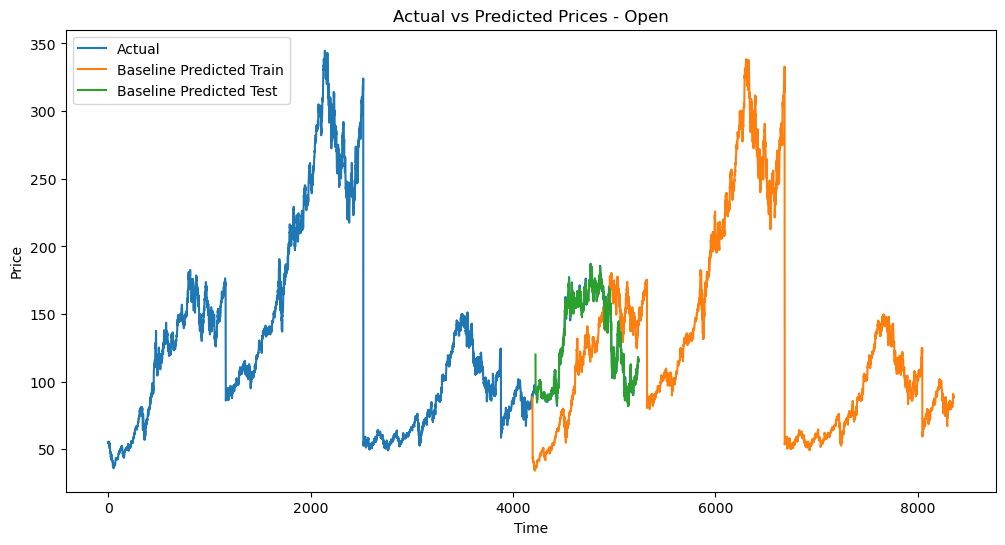

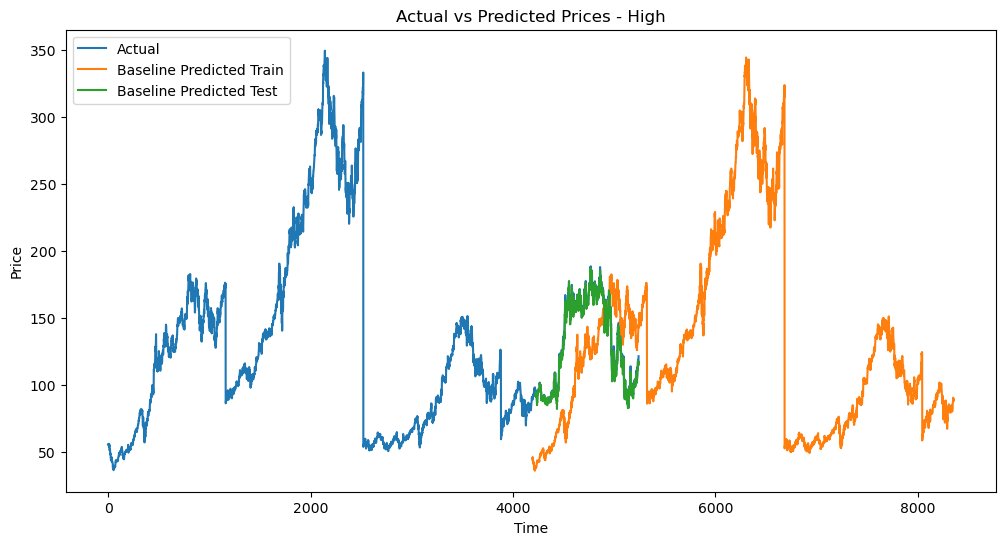

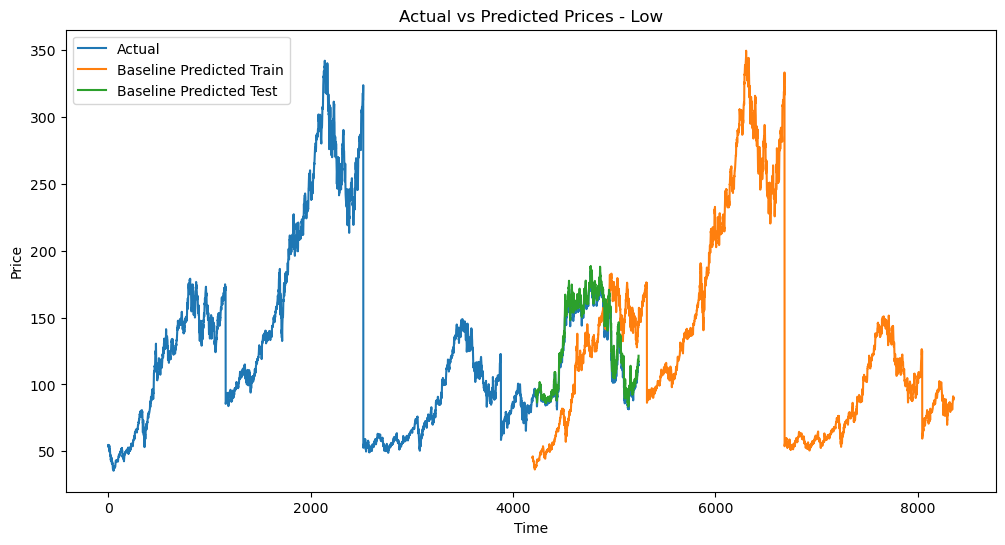

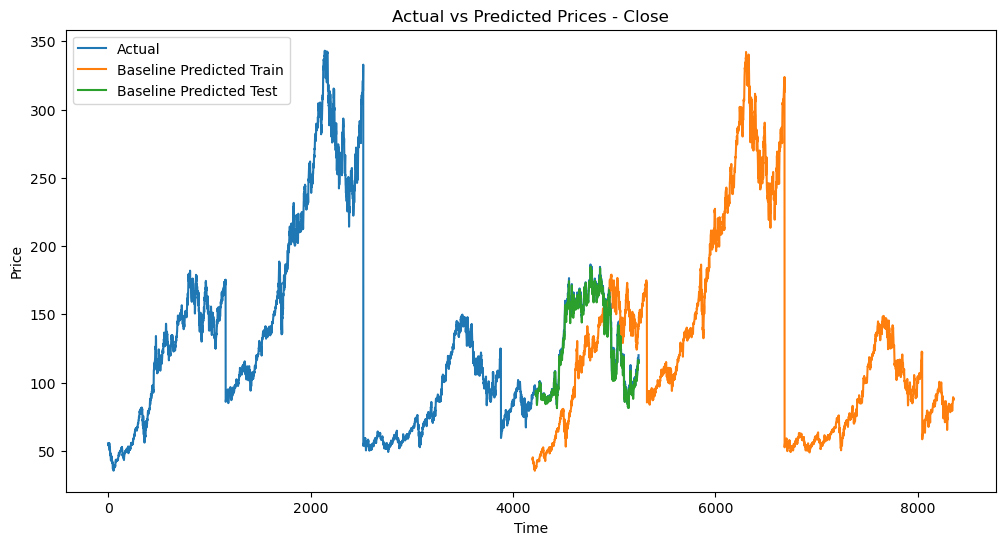

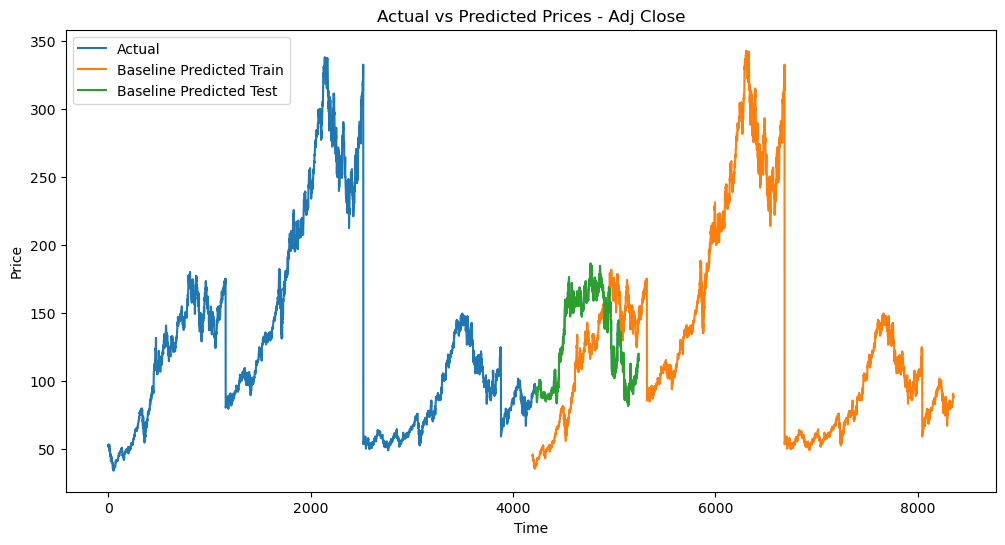

In [43]:
# Get the column names as a list
columns = price.columns.tolist()

# Plot the actual vs predicted prices for each column
for column in columns:
    plt.figure(figsize=(12, 6))
    plt.plot(price[column], label='Actual')
    plt.plot(np.arange(train_size, train_size + len(train_predictions)), baseline_train_predictions[:, columns.index(column)], label='Baseline Predicted Train')
    plt.plot(np.arange(train_size + time_steps, len(price[column])), baseline_test_predictions[:, columns.index(column)], label='Baseline Predicted Test')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.title(f'Actual vs Predicted Prices - {column}')
    plt.legend()
    plt.show()

In [44]:
# Compute the volatility for the baseline model
baseline_train_volatility = np.std(y_train - baseline_train_predictions, axis=0)
baseline_test_volatility = np.std(y_test - baseline_test_predictions, axis=0)

# Print the volatility
print("Baseline Training Volatility:")
print(baseline_train_volatility)
print("Baseline Testing Volatility:")
print(baseline_test_volatility)

Baseline Training Volatility:
[5.48963702 1.62273143 2.28405948 1.7180823  2.06666568]
Baseline Testing Volatility:
[2.05950114e+00 1.52281261e+00 1.87048313e+00 1.57626139e+00
 1.13361244e-14]


The "LSTM Training Volatility" and "LSTM Testing Volatility" refer to the volatility (standard deviation) of the predicted prices for each feature in the training and testing sets, respectively, using the LSTM model.

In the "LSTM Training Volatility" output, you have an array of values representing the volatility for each feature. Each value corresponds to the standard deviation of the predicted prices for a specific feature in the training set. For example, the first value (71.89175) represents the volatility of the predicted prices for the "Open" feature, the second value (72.65818) represents the volatility for the "High" feature, and so on.

Similarly, in the "LSTM Testing Volatility" output, you have an array of values representing the volatility for each feature in the testing set. Each value corresponds to the standard deviation of the predicted prices for a specific feature in the testing set.

These volatility values provide an indication of the variability or dispersion of the predicted prices for each feature. Higher volatility values indicate greater price fluctuations, while lower volatility values indicate more stable prices.

When the values of LSTM predicted volatility are generally higher than the baseline predicted volatility, it indicates that the LSTM model's predictions exhibit greater variability or fluctuations compared to the baseline model.

This higher volatility in LSTM predictions suggests that the LSTM model captures more intricate patterns and dynamics in the data, resulting in more varied and potentially accurate price predictions. The LSTM model takes into account not only the previous day's closing price like the baseline model but also considers the historical sequence of prices over a defined time window. By doing so, the LSTM model can capture more complex relationships and potentially provide more nuanced and accurate predictions.

However, it's important to note that higher volatility does not necessarily mean better performance. While the LSTM model may capture more detailed patterns, it can also be more susceptible to noise and overfitting, leading to less reliable predictions. Therefore, it's crucial to evaluate the overall performance and accuracy of the model using appropriate metrics and compare it to the baseline model and other evaluation criteria.